In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv("SeoulBikeDataClean.csv")
df_cleaned = df[df['functioning_day'] == 'Yes'].copy()


categorical_vars = [
    'hour', 'seasons', 'is_raining', 'is_snowing',
    'is_holiday', 'is_working_day', 'functioning_day'
]

for col in categorical_vars:
    df_cleaned[col] = df_cleaned[col].astype('category')

print(f"Cleaned data shape: {df_cleaned.shape}")
print("Functioning day records only retained.")


Cleaned data shape: (8465, 23)
Functioning day records only retained.


In [2]:
# Poisson regression with functioning_day

formula = (
    'rented_bike_count ~ temperaturec + temperaturec_squared + solar_radiation_mj_m2 + '
    'C(hour) + C(seasons) + C(is_raining) + C(is_snowing) + '
    'C(is_holiday) + C(functioning_day)'
)


poisson_model = smf.glm(
    formula=formula,
    data=df_cleaned,
    family=sm.families.Poisson()
).fit()

print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:      rented_bike_count   No. Observations:                 8465
Model:                            GLM   Df Residuals:                     8432
Model Family:                 Poisson   Df Model:                           32
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.5940e+05
Date:                Sat, 10 May 2025   Deviance:                   8.5171e+05
Time:                        15:18:31   Pearson chi2:                 8.33e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.99

Poisson Train RMSE: 288.99
Poisson Train R²: 0.7976


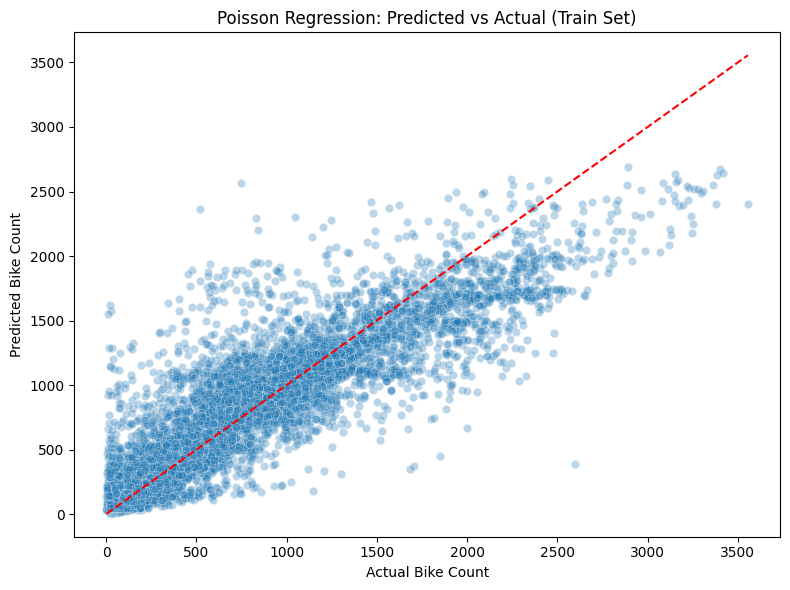

In [3]:
# Evaluate Poisson model fit

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

y_true = df_cleaned['rented_bike_count']
y_pred = poisson_model.predict(df_cleaned)

rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print(f"Poisson Train RMSE: {rmse:.2f}")
print(f"Poisson Train R²: {r2:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.3)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual Bike Count")
plt.ylabel("Predicted Bike Count")
plt.title("Poisson Regression: Predicted vs Actual (Train Set)")
plt.tight_layout()
plt.show()
